# Classifier

In this exercise, you need to build a classifier to beat a demo classifier. This document contains three parts:

1. **Data preprocessing** describes how to prepare your data for a classifier.
2. **Classifier construction** describes how to use [scikit-learn (skearn)](http://scikit-learn.org/stable/) to build classifiers.
3. **Exercise** describes your homework (Chinese).

## 1. Data preprocessing

Data preprocessing is a necessary step to make your data ready for applying a classifier. This section introduces common data preprocessing issues with two examples:

1. A cat dataset to dicuss feature normalization.
2. A Pokémon dataset to discuss categorical and missing values.

See [another document for data preprocessing (Chinese)](/notebooks/unit/data_preprocessing/data_preprocessing.ipynb).

### 1.1 Cat classification (feature normalization)

The cat image dataset from [Andrew Ng](https://www.coursera.org/specializations/deep-learning) contains pictures of cat and other stuff. In our [cat classifier](#cat_classifier), the feature vector (`X`) represents a 64 x 64 x 3 RGB image and the label (`y`) is either `0` for a non-cat image or `1` for a cat image. The range of R, G and B components is 0~255. A common practice is to normalize the values into 0~1 by dividing 255. In this example, the range of 0~255 is known. However, in general cases the distribution of each feature is unknown. You could try [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html), which scales features to a given range.

Model prediction: [1]


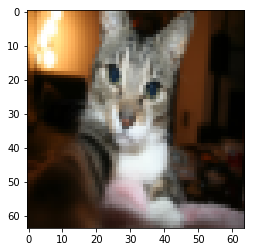

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# load the cat dataset
train_X = np.load('train_X.npy')
train_Y = np.load('train_Y.npy')
test_X = np.load('test_X.npy')
test_Y = np.load('test_Y.npy')

# flatten the image
num_train = train_X.shape[0]
num_test = test_X.shape[0]
flatten_train_X = train_X.reshape(num_train,-1)
flatten_test_X = test_X.reshape(num_test, -1)

# normalize each pixel by dividing 255
norm_train_X = flatten_train_X / 255
norm_test_X = flatten_test_X / 255

# construct a classifier
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(norm_train_X, train_Y)

# use the classifier to predict a image
i = 25
plt.imshow(test_X[i])
print("Model prediction: {}".format(clf.predict(norm_test_X[i].reshape(1,-1))))

### 1.2 Pokémon classification (categorical and missing values)

The [Pokémon dataset](https://www.kaggle.com/alopez247/pokemon) contains categorical features, such as `Type_1` and `Color`.

In [2]:
import pandas as pd
df = pd.read_csv('pokemon_alopez247.csv') # load the Pokémon dataset
df = df.drop(['Number', 'Name', 'Type_2', 'Egg_Group_1', 'Egg_Group_2', 'hasGender', 'Body_Style'], axis=1) # drop unused columns
print(df.info())
df.head(5) # show the first 5 samples

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 16 columns):
Type_1              721 non-null object
Total               721 non-null int64
HP                  721 non-null int64
Attack              721 non-null int64
Defense             721 non-null int64
Sp_Atk              721 non-null int64
Sp_Def              721 non-null int64
Speed               721 non-null int64
Generation          721 non-null int64
isLegendary         721 non-null bool
Color               721 non-null object
Pr_Male             644 non-null float64
hasMegaEvolution    721 non-null bool
Height_m            721 non-null float64
Weight_kg           721 non-null float64
Catch_Rate          721 non-null int64
dtypes: bool(2), float64(3), int64(9), object(2)
memory usage: 80.4+ KB
None


,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,Pr_Male,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate
0,Grass,318,45,49,49,65,65,45,1,False,Green,0.875,False,0.71,6.9,45
1,Grass,405,60,62,63,80,80,60,1,False,Green,0.875,False,0.99,13.0,45
2,Grass,525,80,82,83,100,100,80,1,False,Green,0.875,True,2.01,100.0,45
3,Fire,309,39,52,43,60,50,65,1,False,Red,0.875,False,0.61,8.5,45
4,Fire,405,58,64,58,80,65,80,1,False,Red,0.875,False,1.09,19.0,45


Three categorical-to-numeircal conversions are introduced here. First, `Type_1` is simply transformed to a unique numerical id, which is usually an incremental number along the dataset. The transformed `Type_1` is used as the label (`y`) to predict. Second, `Color` is [one-hot encoded (Chinese)](https://itw01.com/GJFRE5J.html). Using incremental numbers for color would confuse the classifier. Third, boolean (`True` or `False`) must be converted to integer (`1` or `0`) in Python.

In [3]:
# convert `Type_1` into numerical
mapping = { 'Type_1': {
    'Grass': 1,
    'Fire': 2,
    'Water': 3, 'Ice': 3, # one may merge categories
    'Bug': 4,
    'Normal': 5,
    'Poison': 6, 'Ghost': 6, 'Dark': 6,
    'Electric': 7,
    'Ground': 8, 'Rock': 8,
    'Fairy': 9, 'Dragon': 9, 'Flying': 9,
    'Fighting': 10, 'Psychic': 10, 'Steel': 10
}}
df = df.replace(mapping)

# one-hot encoding
dummy_df = pd.get_dummies(df['Color'])
df = pd.concat([df, dummy_df], axis=1)
df = df.drop('Color', axis=1)

# boolean to int
df['isLegendary'] = df['isLegendary'].astype(int)
df['hasMegaEvolution'] = df['hasMegaEvolution'].astype(int)

df.head(5) # show the first 5 samples after preprocessing

,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,...,Black,Blue,Brown,Green,Grey,Pink,Purple,Red,White,Yellow
0,1,318,45,49,49,65,65,45,1,0,...,0,0,0,1,0,0,0,0,0,0
1,1,405,60,62,63,80,80,60,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,525,80,82,83,100,100,80,1,0,...,0,0,0,1,0,0,0,0,0,0
3,2,309,39,52,43,60,50,65,1,0,...,0,0,0,0,0,0,0,1,0,0
4,2,405,58,64,58,80,65,80,1,0,...,0,0,0,0,0,0,0,1,0,0


`Pr_Male` contains 77 **missing values**. Many methods could be used to deal with missing value, such as dorpping the feature/sample or filling by zero/column mean. The best method depends on the dataset.

In [4]:
print(df.isnull().sum()) # Pr_Male has 77 missing values
df.dropna(axis=1, inplace=True) # drop columns with missing values
df.head(5) # show the first 5 samples after dropping

Type_1               0
Total                0
HP                   0
Attack               0
Defense              0
Sp_Atk               0
Sp_Def               0
Speed                0
Generation           0
isLegendary          0
Pr_Male             77
hasMegaEvolution     0
Height_m             0
Weight_kg            0
Catch_Rate           0
Black                0
Blue                 0
Brown                0
Green                0
Grey                 0
Pink                 0
Purple               0
Red                  0
White                0
Yellow               0
dtype: int64


,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,...,Black,Blue,Brown,Green,Grey,Pink,Purple,Red,White,Yellow
0,1,318,45,49,49,65,65,45,1,0,...,0,0,0,1,0,0,0,0,0,0
1,1,405,60,62,63,80,80,60,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,525,80,82,83,100,100,80,1,0,...,0,0,0,1,0,0,0,0,0,0
3,2,309,39,52,43,60,50,65,1,0,...,0,0,0,0,0,0,0,1,0,0
4,2,405,58,64,58,80,65,80,1,0,...,0,0,0,0,0,0,0,1,0,0


In thid end of this section, we want to highlight [pandas](https://pandas.pydata.org/), which provides a lot of tools to process data. For exmaple, it is extremely easy to plot feature histograms with pandas.

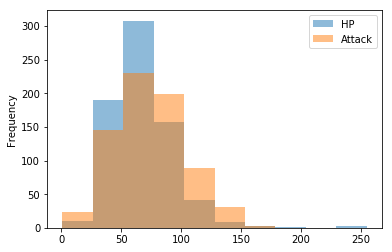

In [5]:
df[['HP', 'Attack']].plot.hist(alpha=0.5)

## 2. Classifier construction

In python, one can use [scikit-learn (sklearn)](http://scikit-learn.org/stable/) instead of implementing classifier from scratch. sklearn provides various mahcine learning algorithms, including both supervised and unsupervised ones. The above cat classifier shows how to use sklearn for logistic regression. Below is the code for constructing a Pokémon classifier.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# split data
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

def get_arrays(df):
    y = np.array(df['Type_1']) # use `Type_1` as the label to predict
    X = np.array(df.iloc[:,1:]) # use other column as features
    return X, y
train_X, train_y = get_arrays(df_train)
test_X, test_y = get_arrays(df_test)

scaler = StandardScaler() # normalize
svc = SVC(C=5, gamma=0.04) # use SVM as the classifier
clf = Pipeline([('scaler', scaler), ('svc', svc)])
clf.fit(train_X, train_y) # train the classifier
print("Accuracy: %.3f" % (clf.score(train_X, train_y)))
print("Accuracy: %.3f" % (clf.score(test_X, test_y)))

Accuracy: 0.743
Accuracy: 0.414


# 作業

 * 本次作業為建構 [UCI German Credit Data](https://onlinecourses.science.psu.edu/stat857/node/215) 分類模型  
 * 該資料集包含 1000 筆貸款資料，其中 700 筆正樣本(credit-worthy)以及 300 筆負樣本(not credit-worthy)。每個樣本有 20 個特徵，其中 17 個類別(categorical)特徵，3 個為數值(numeric)特徵，請參考[特徵的說明](https://onlinecourses.science.psu.edu/stat857/node/222)。
 * 利用準備好的工具，建構分類模型，請參考 [Classifier comparison](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) 選擇機器學習分類器。
 * 以下為助教提供的資料集介紹及示範分類器

In [1]:
# 載入準備好的工具
import sys
sys.path.append('.prepared')
import classifier as prepared

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### 資料集

UCI German Credit Data 包含 800 筆訓練資料與 200 筆測試資料。每筆由一個 20 維的特徵向量與一個 `1` 或 `0` 的類別組成。其中 `1` 代表正樣本(credit-worthy)；`0` 代表負樣本(not credit-worthy)。

In [2]:
print(prepared.x_train.shape) # 800 筆訓練資料，每筆資料有 20 個特徵
print(prepared.x_train[:3])   # 印出前三筆訓練資料的特徵
print(prepared.y_train[:3])   # 印出前三筆訓練資料的類別
print()
print(prepared.x_test.shape)
print(prepared.y_test.shape)

(800, 20)
[[   2   36    1    4 3990    5    2    3    2    1    2    4   29    1
     2    1    1    1    1    1]
 [   4   24    2    0 1249    1    2    4    4    1    2    1   28    3
     2    1    3    1    1    1]
 [   4    6    4    3 1554    1    4    1    2    1    2    3   24    3
     1    2    3    1    2    1]]
[1 1 1]

(200, 20)
(200,)


### 示範分類器

使用訓練資料(`x_train` 與 `y_train`)訓練示範分類器(`demo_clf`)，在訓練資料與測試資料上評估其正確率。請修改下方[動手做](#動手做)的程式碼試著超越這個示範分類器。

In [5]:
# 使用訓練資料訓練示範分類器, `demo_clf`
demo_clf = prepared.demo(prepared.x_train, prepared.y_train)

# 在訓練資料與測試資料上評估其正確率
prepared.evaluate(demo_clf)

if 'DecisionTreeClassifier' == type(clf).__name__: # if `clf` is a decision tree
    prepared.plot(clf) # plot the decision tree

Accuracy on training samples: 1.0
Accuracy on test samples: 0.765



### 動手做

修改以下程式區段，試著使用不同的機器學習演算法，建構比示範分類器更好的模型。換句話說，在測試資料上的正確率超過 `0.765`。

In [4]:
# TODO: import classifiers you want to use
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# TODO: try different classifiers


clf = RandomForestClassifier(max_depth=10, n_estimators=12, max_features=6, random_state=14)
#因為RandomForestClassifier這個model有著較高的準確率和並行化處理使得更快速更準確
#max_depth :  which means that each tree in the forest can have a maximum depth of how many levels.
#n_estimators : meaning that the random forest will consist of how many decision trees.
#max_features : meaning each tree will consider a maximum of how many features when making a split.
#random_state : This parameter is used to seed the random number generator.




clf = clf.fit(prepared.x_train, prepared.y_train) # train `clf`
prepared.evaluate(clf) # evaluate `clf`

Accuracy on training samples: 0.95625
Accuracy on test samples: 0.8

